In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Training_DU_Clustering70.csv", skipinitialspace=True, sep=',')
df

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,TransmissionID,NationalityID
0,2001,8,1.0,55117,3192.0,3947.0,3192.0,3947.0,4315.0,1054,0,0
1,2006,3,1.0,72728,12423.0,13917.0,13721.0,15319.0,10835.0,920,0,0
2,2006,3,1.0,80650,13271.0,14833.0,12982.0,18542.0,11515.0,983,0,0
3,2002,8,1.0,87788,5286.0,8768.0,5503.0,8901.0,9110.0,1283,0,0
4,2002,7,1.0,58350,5617.0,6566.0,5617.0,6566.0,6455.0,1054,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35672,2006,4,1.0,73564,10289.0,14907.0,9284.0,13919.0,8315.0,1272,0,0
35673,2006,4,1.0,80855,10120.0,14618.0,10795.0,14669.0,10115.0,1373,0,0
35674,2006,4,1.0,82286,12341.0,16405.0,13115.0,16693.0,8675.0,1373,0,0
35675,2006,3,1.0,68976,13765.0,15366.0,13981.0,15599.0,9215.0,1118,0,0


In [3]:
Final_df = pd.read_csv("Training_DU_Clustering_forAnalysis70.csv", skipinitialspace=True, sep=',')
Final_df

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,MMRCurrentRetailAveragePrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TransmissionID,NationalityID
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,3947.0,23359,91752,CA,4315.0,0,1054,4D,0,0
1,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,15319.0,19662,78219,TX,10835.0,0,920,NaN,0,0
2,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,18542.0,19619,34761,FL,11515.0,0,983,NaN,0,0
3,2010-12-08,1500 RAM,QUAD CAB,2002,23228,1,MANHEIM,8,DODGE,4.7L,...,8901.0,18880,29532,SC,9110.0,0,1283,NaN,0,0
4,2009-07-31,1500 RAM,QUAD CAB,2002,60207,1,ADESA,7,DODGE,5.9L,...,6566.0,18881,37771,TN,6455.0,0,1054,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,2010-10-11,ZEPHYR,SEDAN,2006,64639,0,ADESA,4,LINCOLN,NaN,...,13919.0,21053,85226,AZ,8315.0,0,1272,4D,0,0
35673,2010-11-23,ZEPHYR,SEDAN,2006,9964,0,MANHEIM,4,LINCOLN,NaN,...,14669.0,52646,21075,MD,10115.0,0,1373,4D,0,0
35674,2010-02-18,ZEPHYR,SEDAN,2006,25215,0,OTHER,4,LINCOLN,NaN,...,16693.0,3453,80229,CO,8675.0,0,1373,4D,0,0
35675,2009-03-03,ZEPHYR,SEDAN,2006,32556,0,MANHEIM,3,LINCOLN,NaN,...,15599.0,3453,80022,CO,9215.0,0,1118,4D,0,0


# Inizio Analisi 

In [4]:
columns=['VehicleAge','VehOdo','VehBCost', 'WarrantyCost']
pdf=df[columns]
pdf.head()

,VehicleAge,VehOdo,VehBCost,WarrantyCost
0,8,55117,4315.0,1054
1,3,72728,10835.0,920
2,3,80650,11515.0,983
3,8,87788,9110.0,1283
4,7,58350,6455.0,1054


## Normalization

In [5]:
scaler = StandardScaler()
scaler.fit(pdf.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X = scaler.fit_transform(pdf.values)

In [7]:
X[:5]

array([[ 2.19866922, -1.09637652, -1.32029031, -0.34928202],
       [-0.67442972,  0.10734225,  2.32867295, -0.56738066],
       [-0.67442972,  0.64881407,  2.70923967, -0.46484175],
       [ 2.19866922,  1.13669917,  1.36326472,  0.0234388 ],
       [ 1.62404944, -0.8753997 , -0.12262446, -0.34928202]])

Knee Method to estimate the best K

In [9]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=150)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

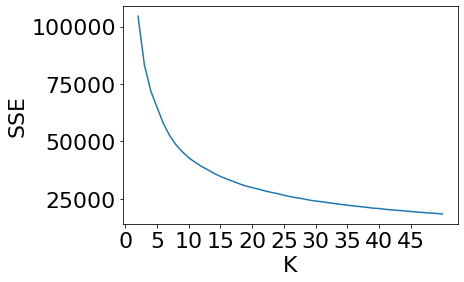

In [25]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Prima analisi K=13

In [116]:
kmeans = KMeans(n_clusters=13, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=13, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
kmeans.labels_[:5]

array([11, 12, 12, 10, 11])

In [118]:
np.unique(kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([4063, 3628, 2945, 2555, 2862, 3343, 3336, 1983, 3691,  351, 2633,
        2296, 1991], dtype=int64))

In [119]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 4063,
 1: 3628,
 2: 2945,
 3: 2555,
 4: 2862,
 5: 3343,
 6: 3336,
 7: 1983,
 8: 3691,
 9: 351,
 10: 2633,
 11: 2296,
 12: 1991}

Two dimention view

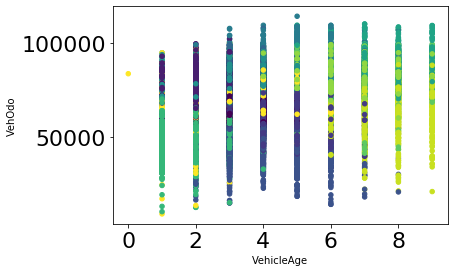

In [120]:
plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

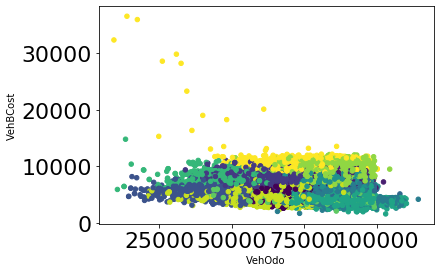

In [121]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

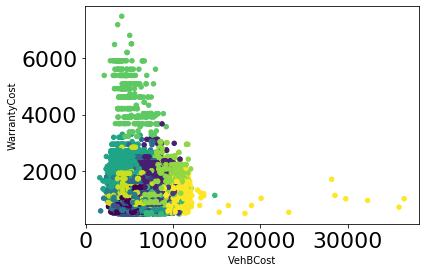

In [122]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [123]:
kmeans.cluster_centers_

array([[-0.24519736, -0.27004596, -0.738823  , -0.58361221],
       [-0.83408152,  0.4306963 ,  0.60345229,  0.92421726],
       [ 0.17979807, -0.57298115,  0.64181821, -0.31200844],
       [-0.15084228, -1.63031832, -0.54610149, -0.80663685],
       [ 0.08329743,  0.66790649, -0.28325519,  0.90555121],
       [ 0.50387623,  0.96337473, -1.12792269, -0.3215821 ],
       [-0.52922454,  0.53772954,  0.31270149, -0.54420831],
       [ 1.65215741,  1.04093017, -1.20181633,  1.31392923],
       [-1.37269398, -1.43343328,  0.4421757 , -0.74101843],
       [ 1.00031685,  0.3472864 , -0.79943466,  5.47183819],
       [ 0.95449626,  0.8264071 ,  1.14676078,  0.35853129],
       [ 1.60402784, -0.34927719, -0.83637889,  0.04658888],
       [-0.52060132,  0.09822594,  1.90149864, -0.27380903]])

Two dimentional view with the centroids

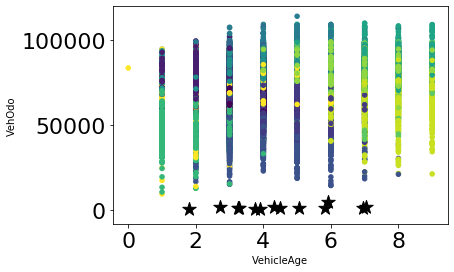

In [124]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

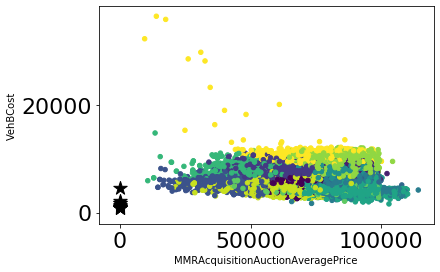

In [125]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.show()

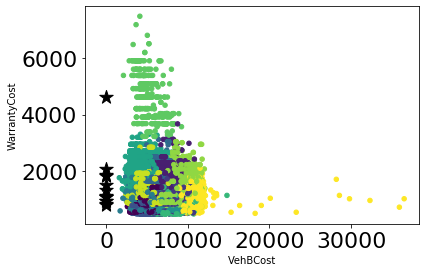

In [126]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

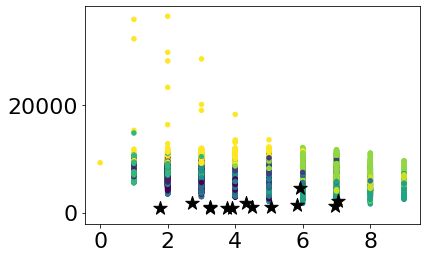

In [127]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

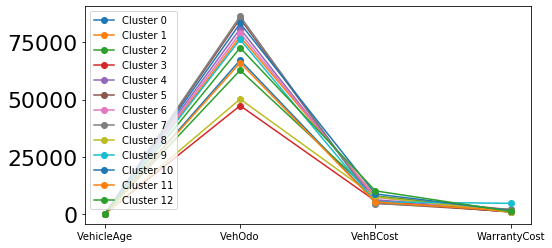

In [128]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [129]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 37514.0102604164
Silhouette 0.21331025112746932


## Seconda analisi K=10

In [130]:
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 4297,
 1: 5255,
 2: 5130,
 3: 2777,
 4: 3406,
 5: 4615,
 6: 351,
 7: 2746,
 8: 3880,
 9: 3220}

Two dimention view

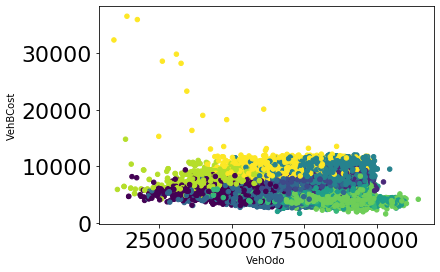

In [132]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

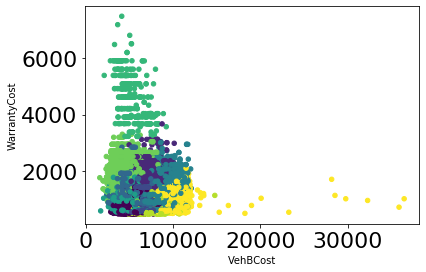

In [133]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [134]:
kmeans.cluster_centers_

array([[-0.09231605, -1.1696438 , -0.58297279, -0.72380745],
       [-0.59404193,  0.50323311,  0.36601227,  0.95125938],
       [-0.48034987,  0.13255226,  0.05616836, -0.52730097],
       [ 1.42968057, -0.37758574, -0.6955173 ,  0.02524816],
       [ 0.84162796,  0.74166577,  1.08587503,  0.23338748],
       [ 0.27858   ,  0.78521184, -1.03861364, -0.30983833],
       [ 1.00031685,  0.3472864 , -0.79943466,  5.47183819],
       [ 1.47694175,  0.99975224, -1.09435786,  1.20782615],
       [-1.31036203, -1.51379717,  0.40451265, -0.74539751],
       [-0.45221486, -0.12373556,  1.56222899, -0.30178352]])

Two dimentional view with the centroids

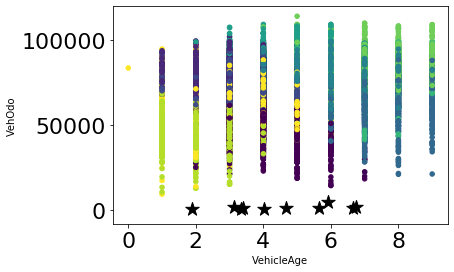

In [135]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

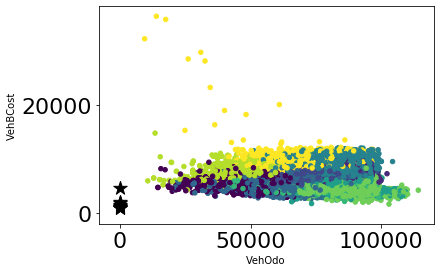

In [136]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

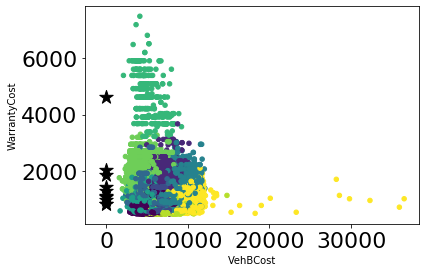

In [137]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

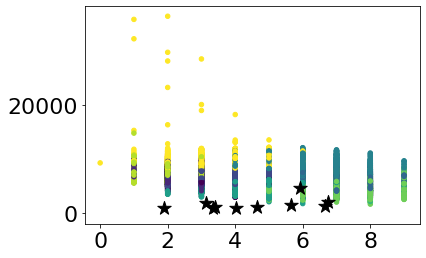

In [138]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

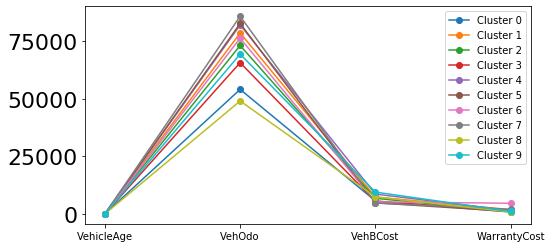

In [139]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [140]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 42830.37057500256
Silhouette 0.2235240340081353


## Terza analisi K=7

In [68]:
kmeans = KMeans(n_clusters=7, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=7, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 6743, 1: 355, 2: 5150, 3: 5166, 4: 6129, 5: 5632, 6: 6502}

Two dimention view

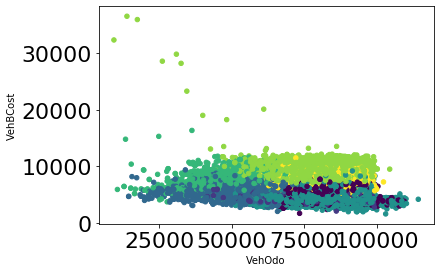

In [71]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

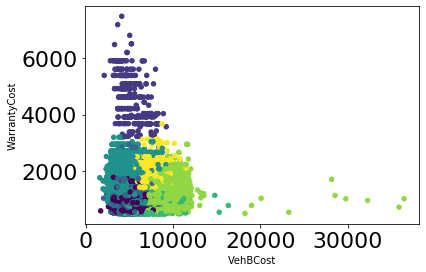

In [72]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [73]:
kmeans.cluster_centers_

array([[-0.04256942,  0.56701497, -0.70457584, -0.44887624],
       [ 1.00734482,  0.35171994, -0.79603364,  5.4464109 ],
       [ 0.26774167, -1.04624359, -0.56341769, -0.57812106],
       [ 1.45737856,  0.71112245, -0.95515303,  0.751938  ],
       [-1.12832396, -1.22582612,  0.42061827, -0.69015092],
       [ 0.33893867,  0.37918858,  1.30785105, -0.13937227],
       [-0.61274337,  0.48265714,  0.45222624,  0.79950172]])

Two dimentional view with the centroids

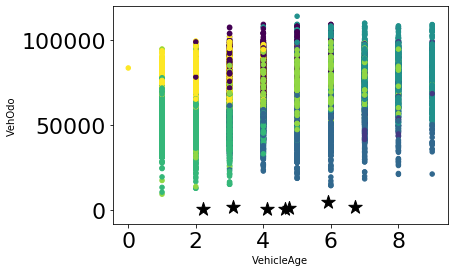

In [74]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

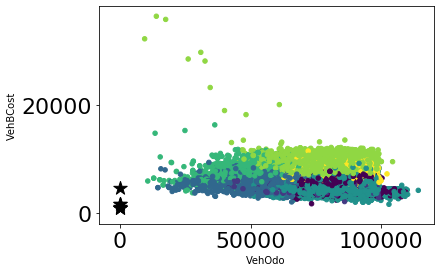

In [75]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

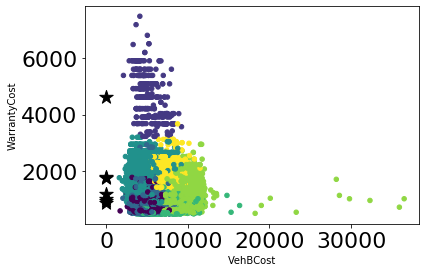

In [76]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

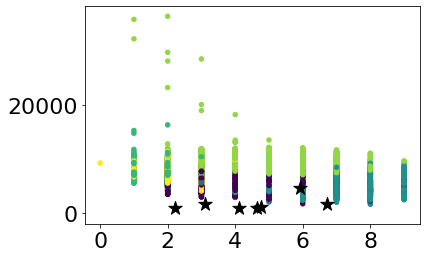

In [77]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

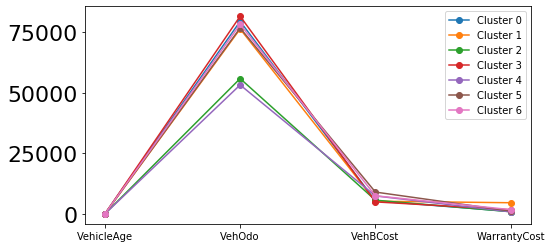

In [78]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [79]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 52434.4804204376
Silhouette 0.23130699495709306


## Quarta analisi K=5 [Best silhouette]

In [80]:
kmeans = KMeans(n_clusters=5, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 9367, 1: 3656, 2: 9007, 3: 6182, 4: 7465}

Two dimention view

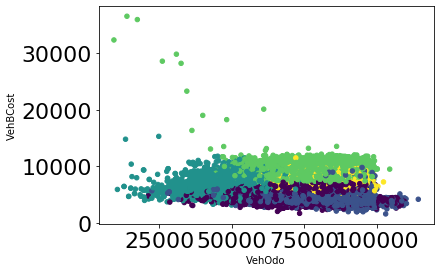

In [85]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

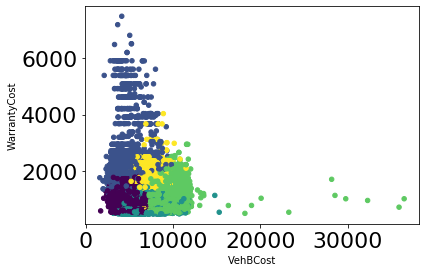

In [86]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [87]:
kmeans.cluster_centers_

array([[ 0.50013728,  0.25584411, -0.86091201, -0.36171606],
       [ 1.44245827,  0.77703348, -0.90508415,  1.62645039],
       [-0.78694134, -1.2336859 ,  0.08579783, -0.70236984],
       [ 0.30483751,  0.34869179,  1.26866621, -0.17186185],
       [-0.63905071,  0.49766035,  0.36914497,  0.64757705]])

Two dimentional view with the centroids

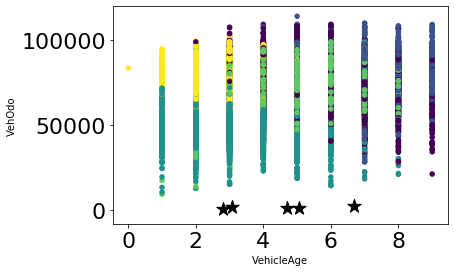

In [88]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

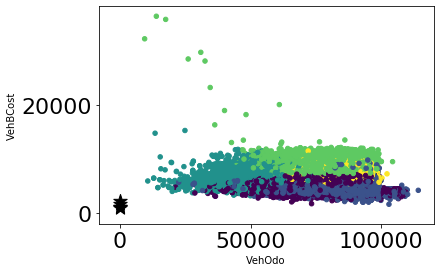

In [89]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

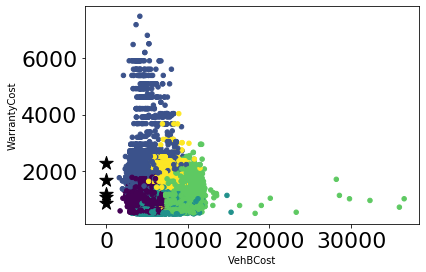

In [90]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

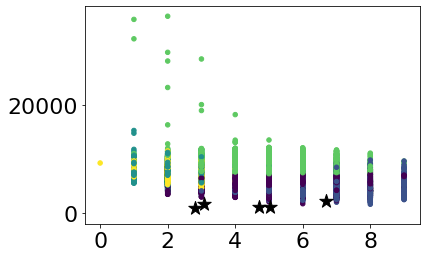

In [91]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

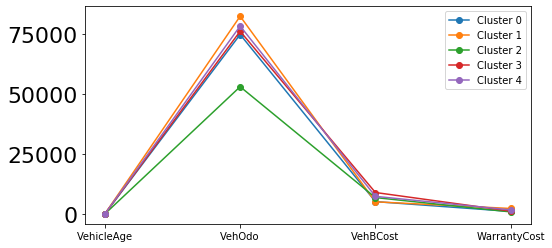

In [92]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [93]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 64792.49669009353
Silhouette 0.23670948664351388


## Quinta analisi K=4

In [94]:
kmeans = KMeans(n_clusters=4, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 9307, 1: 10319, 2: 12057, 3: 3994}

Two dimention view

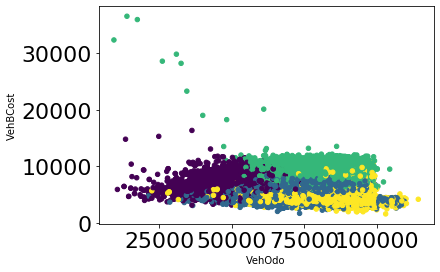

In [96]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

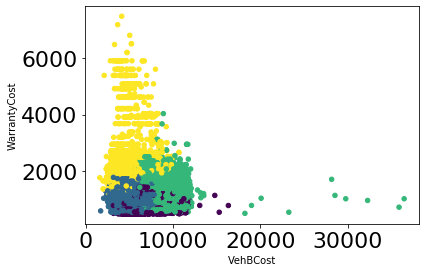

In [97]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [98]:
kmeans.cluster_centers_

array([[-0.75331725, -1.22313319,  0.10869094, -0.7041146 ],
       [ 0.47742708,  0.27895138, -0.78356092, -0.33343881],
       [-0.27578396,  0.44480008,  0.86105746,  0.29923153],
       [ 1.35632558,  0.78792067, -0.82950645,  1.60073303]])

Two dimentional view with the centroids

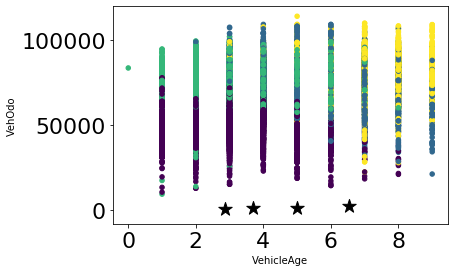

In [99]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

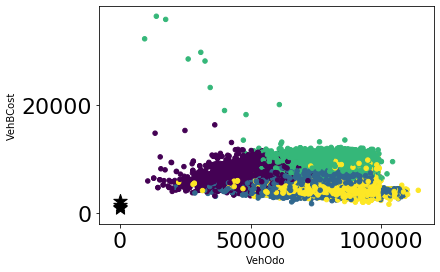

In [100]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

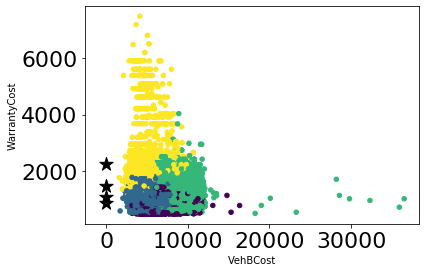

In [101]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

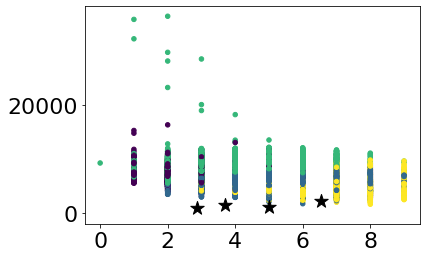

In [102]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

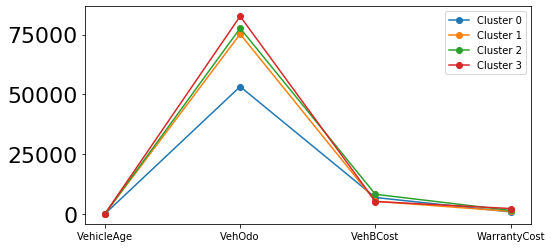

In [103]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [104]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 72025.5369546618
Silhouette 0.24215840879750056


## Sesta analisi K=3 BEST Silhouette

In [105]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 13006, 1: 10795, 2: 11876}

Two dimention view

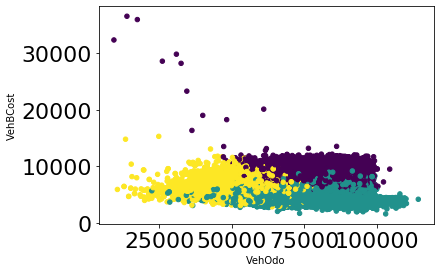

In [107]:
plt.scatter(pdf['VehOdo'], pdf['VehBCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

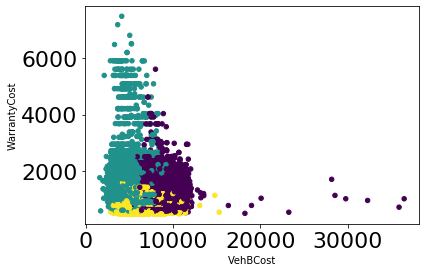

In [108]:
plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

Centroids

In [109]:
kmeans.cluster_centers_

array([[-0.25432991,  0.45738004,  0.81066185,  0.26298592],
       [ 0.94759425,  0.57596507, -0.89602731,  0.44699791],
       [-0.58320641, -1.02398916, -0.07231288, -0.69407453]])

Two dimentional view with the centroids

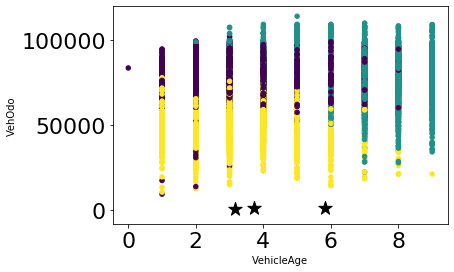

In [110]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehOdo'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehOdo')
plt.show()

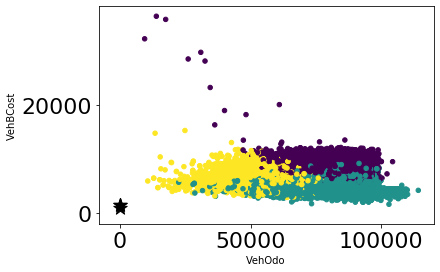

In [111]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehOdo'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehOdo')
plt.ylabel('VehBCost')
plt.show()

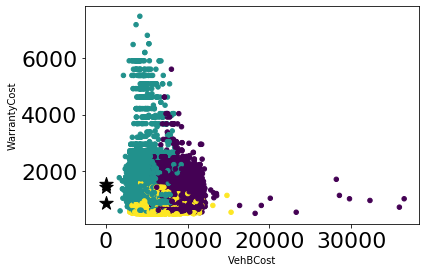

In [112]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehBCost'], pdf['WarrantyCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehBCost')
plt.ylabel('WarrantyCost')
plt.show()

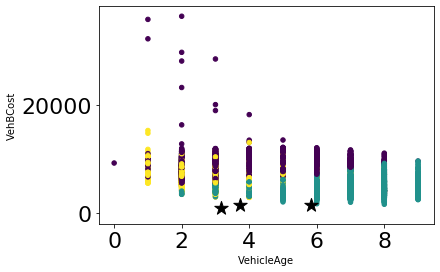

In [113]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(pdf['VehicleAge'], pdf['VehBCost'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('VehicleAge')
plt.ylabel('VehBCost')
plt.show()

Visualization of clusters centers by means of parallel coordinates

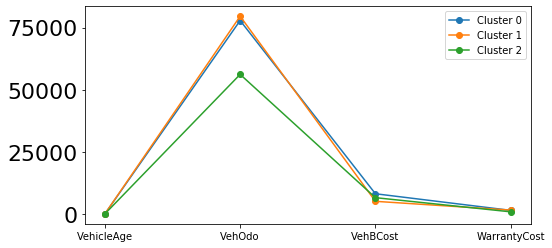

In [114]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(pdf.columns)), pdf.columns, fontsize=10)
plt.legend(fontsize=10)
plt.show()

SSE and Clustering Validation

In [115]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 83316.14746344162
Silhouette 0.2492096586209257


## Comparison of the results of the different K

### K=13 
SSE 37514.0102604164

Silhouette 0.21331025112746932

### K=10 
SSE 42830.37057500256

Silhouette 0.2235240340081353

### K=7 BEST Combination
SSE 52434.4804204376

Silhouette 0.23130699495709306


### K=5 
SSE 64792.49669009353

Silhouette 0.23670948664351388


### K=4
SSE 72025.5369546618

Silhouette 0.24215840879750056

### K=3 BEST Silhouette
SSE 83316.14746344162

Silhouette 0.2492096586209257


### Other fast tests with other values of K

In [32]:
kmeans = KMeans(n_clusters=15, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=15, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 34705.051724560886
Silhouette 0.20998284351335067


 BEST Sum of Squared Error

In [34]:
kmeans = KMeans(n_clusters=14, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=14, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 36081.84657855267
Silhouette 0.2135013615230376


In [36]:
kmeans = KMeans(n_clusters=12, n_init=20, max_iter=150)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=12, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 39106.4887530877
Silhouette 0.22020702418908358
